In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from random import random

In [34]:
df = pd.read_csv("SpotifyData.csv")
grouped = df.groupby('year').apply(lambda x: x.sort_values(['year'], ascending=True))
df['year'].value_counts()

2012    115
2017    111
2001    108
2018    107
2010    107
2014    104
2005    104
2011     99
2016     99
2015     99
2003     97
2008     97
2004     96
2006     95
2007     94
2002     90
2019     89
2013     89
2009     84
2000     74
1999     38
2020      3
1998      1
Name: year, dtype: int64

In [35]:
# group the data frame by the 'year' column and sort the groups based on the values in that column
grouped = df.groupby('year').apply(lambda x: x.sort_values(['year'], ascending=True))

# reset the index of the resulting data frame
grouped = grouped.reset_index(drop=True)

print(grouped)

                     artist                                            song  \
0             Missy Elliott                                        Hot Boyz   
1                 blink-182                            All The Small Things   
2              Donell Jones  U Know What's Up (feat. Lisa "Left Eye" Lopes)   
3        Christina Aguilera                                   I Turn to You   
4     Red Hot Chili Peppers                                       Otherside   
...                     ...                                             ...   
1995               Anuel AA                                           China   
1996            Post Malone                                         Circles   
1997               t.A.T.u.                         All The Things She Said   
1998             Will Smith                                          Switch   
1999                    NSG                                         Options   

      duration  year  popularity  danceability  ene

In [36]:
#Drop Instrumentalness, acousticness, speechness, key, mode, danceability
grouped.drop(['instrumentalness', 'acousticness', 'speechiness', 'key', 'mode', 'danceability', "artist", "song", "liveness"], axis = 1, inplace=True)
grouped.dropna(axis=0, inplace=True)
grouped['duration'] = df['duration'] / 1000
grouped= grouped[grouped['popularity']>20]
grouped.describe()

,duration,year,popularity,energy,loudness,valence,tempo
count,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000
mean,229.131965,2009.201542,65.846916,0.721867,-5.495205,0.553893,120.158735
std,39.753895,5.889536,10.607587,0.152242,1.944991,0.220435,27.187386
min,113.000000,1998.000000,21.000000,0.054900,-20.514000,0.040600,60.019000
25%,204.143250,2004.000000,59.000000,0.625000,-6.483250,0.392750,98.040000
50%,223.504500,2009.000000,67.000000,0.737500,-5.270000,0.560000,120.018000
75%,249.036000,2014.000000,74.000000,0.840250,-4.145500,0.733000,135.096000
max,484.146000,2020.000000,89.000000,0.999000,-0.276000,0.973000,210.851000


In [37]:
#Data Normalization: Min-Max scaling
#This turns all the values into a number between 0 and 1

# copy the data
dfmms = grouped.copy()
  
# apply normalization techniques
for column in dfmms.columns:
    dfmms[column] = (dfmms[column] - dfmms[column].min()) / (dfmms[column].max() - dfmms[column].min())    
  
# view normalized data
print(dfmms)
dfmms.describe()

      duration      year  popularity    energy  loudness   valence     tempo
0     0.264478  0.000000    0.411765  0.413198  0.458197  0.521665  0.139931
1     0.145673  0.045455    0.852941  0.891961  0.770630  0.690047  0.588118
2     0.370598  0.045455    0.617647  0.517000  0.708963  0.887387  0.285172
3     0.300402  0.045455    0.588235  0.439678  0.600751  0.276062  0.445250
4     0.235918  0.045455    0.838235  0.783921  0.852308  0.506650  0.419076
...        ...       ...         ...       ...       ...       ...       ...
1995  0.183286  0.954545    0.808824  0.797691  0.830714  0.609610  0.298398
1996  0.176281  0.954545    0.941176  0.748967  0.840844  0.549550  0.397946
1997  0.236007  1.000000    0.264706  0.825230  0.728679  0.365079  0.794931
1998  0.156351  1.000000    0.191176  0.895138  0.799931  0.469112  0.281751
1999  0.275579  1.000000    0.529412  0.599619  0.782192  0.773702  0.278283

[1816 rows x 7 columns]


,duration,year,popularity,energy,loudness,valence,tempo
count,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000
mean,0.312901,0.509161,0.659513,0.706458,0.742109,0.550507,0.398720
std,0.107111,0.267706,0.155994,0.161257,0.096106,0.236416,0.180249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245572,0.272727,0.558824,0.603856,0.693287,0.377681,0.252075
50%,0.297739,0.500000,0.676471,0.723017,0.753236,0.557057,0.397787
75%,0.366530,0.727273,0.779412,0.831850,0.808800,0.742600,0.497752
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


            duration      year  popularity    energy  loudness   valence  \
duration    1.000000 -0.305924   -0.059964  0.071727  0.012613  0.129276   
year       -0.305924  1.000000    0.299172 -0.115790  0.017051 -0.218760   
popularity -0.059964  0.299172    1.000000 -0.088780  0.013715 -0.098181   
energy      0.071727 -0.115790   -0.088780  1.000000  0.654013  0.333432   
loudness    0.012613  0.017051    0.013715  0.654013  1.000000  0.225632   
valence     0.129276 -0.218760   -0.098181  0.333432  0.225632  1.000000   
tempo      -0.023231  0.069409    0.024903  0.154186  0.078457 -0.037336   

               tempo  
duration   -0.023231  
year        0.069409  
popularity  0.024903  
energy      0.154186  
loudness    0.078457  
valence    -0.037336  
tempo       1.000000  


<AxesSubplot:>

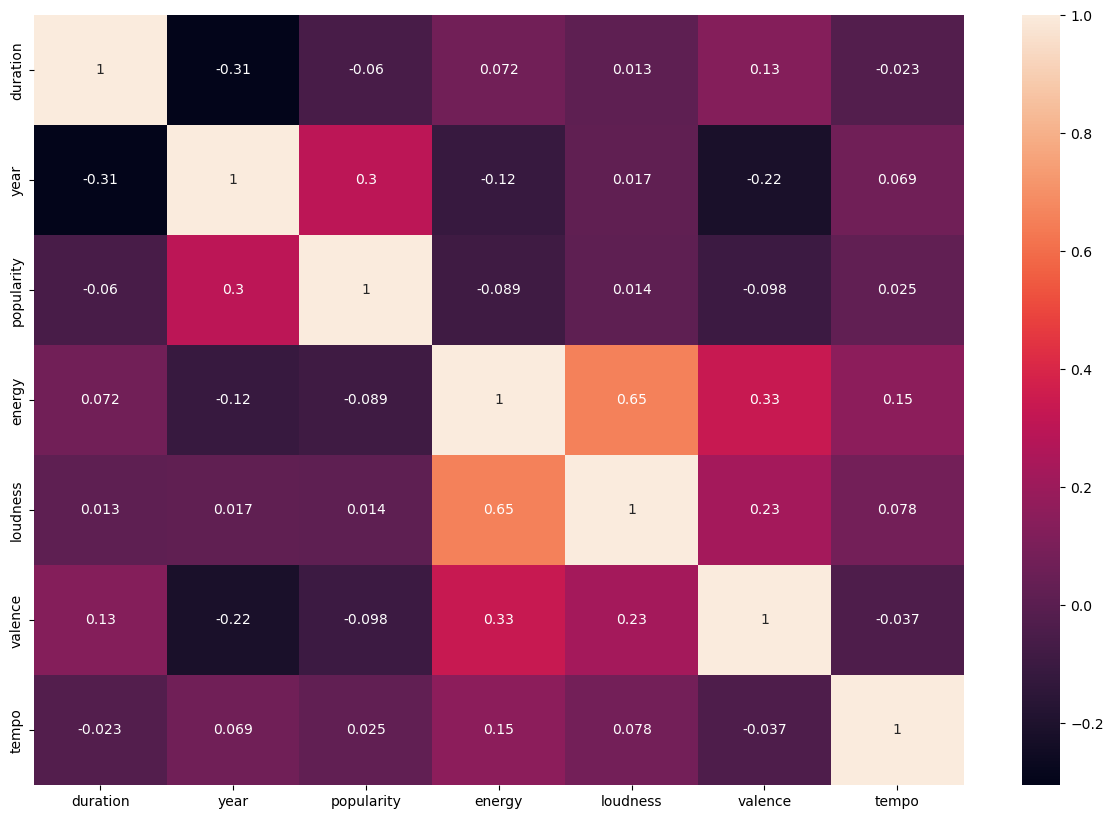

In [38]:
cor = dfmms.corr()
print(cor)
plt.figure(figsize= (15,10))
sns.heatmap(cor, annot=True)

In [39]:
# Test/Train Split
length = len(dfmms.index)
split = int(length * 0.7)
train = dfmms[0:split]
test = dfmms[split:length]

print(train)


      duration      year  popularity    energy  loudness   valence     tempo
0     0.264478  0.000000    0.411765  0.413198  0.458197  0.521665  0.139931
1     0.145673  0.045455    0.852941  0.891961  0.770630  0.690047  0.588118
2     0.370598  0.045455    0.617647  0.517000  0.708963  0.887387  0.285172
3     0.300402  0.045455    0.588235  0.439678  0.600751  0.276062  0.445250
4     0.235918  0.045455    0.838235  0.783921  0.852308  0.506650  0.419076
...        ...       ...         ...       ...       ...       ...       ...
1355  0.393651  0.681818    0.823529  0.395191  0.544026  0.317889  0.164813
1356  0.166654  0.681818    0.632353  0.689652  0.675215  0.211712  0.794871
1357  0.307119  0.681818    0.779412  0.711895  0.744046  0.515230  0.410828
1358  0.100769  0.681818    0.794118  0.678000  0.777350  0.280352  0.726066
1359  0.268250  0.681818    0.602941  0.784980  0.843364  0.258902  0.457032

[1271 rows x 7 columns]


In [40]:
# Helper functions
def take_random_step(model):
  return [
      model[0] + (random() - 0.5), # Subtract off 0.5 to generate negative and positive steps
      model[1] + (random() - 0.5),
      model[2] + (random() - 0.5),
      model[3] + (random() - 0.5),
      model[4] + (random() - 0.5),
      model[5] + (random() - 0.5),
      model[6] + (random() - 0.5)
  ]

def take_best_step(trainDF, model):
  old_distance = calculateDistance(trainDF, model)
  for i in range(50): # try 50 times; if we fail to improve, return the old model
    new_model = take_random_step(model)
    new_distance = calculateDistance(trainDF, new_model)
    if new_distance < old_distance:
      return new_model
  return model # by default, return the old model

def calculateDistance(trainDF, model):
  sum = 0
  for i in range(len(trainDF.index[:10])):
    # Get data points
    duration = trainDF.iat[i, 0]
    year = trainDF.iat[i, 1]
    energy = trainDF.iat[i, 3]
    loudness = trainDF.iat[i, 4]
    valence = trainDF.iat[i, 5]   
    tempo = trainDF.iat[i, 6]

    # Get coefficients
    a = model[0]
    b = model[1]
    c = model[2]
    d = model[3]
    e = model[4]
    f = model[5]
    g = model[6] 

    # Calculate distance using formula: https://i.ytimg.com/vi/zWMTTRJ0l4w/maxresdefault.jpg
    numerator = abs((a * duration) + (b * year) + (c * loudness) + (d * valence) + (e * valence) + (d * tempo) + g)
    denominator = math.sqrt((a * a) + (b * b) + (c * c ) + (d * d) + (e * e) + (f * f) + (g * g))
    distance = numerator / denominator
    sum = sum + distance
 
  return sum

In [41]:
def trainMRModel(trainDF, iterations):
  
  # Initialize naive model A
  modelA = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5] # [a, b, c, d]

  distanceA = calculateDistance(trainDF, modelA)
  print("First model - weights: ", modelA, " distance: ", distanceA)
  
  modelB = modelA[:] # make a copy of model A -> 'modelB = modelA' just references original model A
  
  # Randomly take steps for desired iterations
  for i in range(iterations):
    modelB = take_best_step(trainDF, modelB)
  
  # Calculate distance of best model found
  distanceB = calculateDistance(trainDF, modelB)
  print("Final model - weights: ", modelB, " distance: ", distanceB)

In [42]:
trainMRModel(train, 100)

First model - weights:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]  distance:  13.823065756016021
Final model - weights:  [-0.22635442959880425, 5.733506458835268, -0.4452816682417228, -0.2157108307619261, 0.3217131537625313, -5.085842657998349, 0.1523686581908853]  distance:  0.03828362964831177


In [ ]:
weights = [-0.22635442959880425, 5.733506458835268, -0.4452816682417228, -0.2157108307619261, 0.3217131537625313, -5.085842657998349, 0.1523686581908853]
for i in range(len(weights)):
    a = weights[0]
    b = weights[1]
    c = weights[2]
    d = weights[3]
    e = weights[4]
    f = weights[5]
    g = weights[6]

    